# TN electricity bill calculator:

date: 19.2.2025

1. Input: units , output: calculated bill
2. Input: bill_amount, output: estimated units


log: now kernel runs from root and not root/notebooks. So relative paths in this nb may need to be altered.

In [2]:
import pandas as pd 
import numpy as np
import os
from pprint import pprint


## Load Dataset

In [3]:
print(os.getcwd())
DATA_FOLDER= "data"
base_dir="data/processed"

e:\code\tn-electricity-bill-calculator


In [ ]:

file_under500=os.path.join(DATA_FOLDER,r"raw/under500.csv")
file_over500= os.path.join(DATA_FOLDER,r"raw/over500.csv")

# Load dataset, dataset is ready
df_under500=pd.read_csv(filepath_or_buffer=file_under500)
df_over500=pd.read_csv(filepath_or_buffer=file_over500)

In [4]:
df_under500['slab']=df_under500['start'].astype('str')+"-"+df_under500['end'].astype('str')
df_under500=df_under500.set_index('slab')


In [5]:
df_over500['slab']=df_over500['start'].astype('str')+"-"+df_over500['end'].astype('str')
df_over500=df_over500.set_index('slab')
df_over500

,start,end,rate
slab,,,
0-100.0,0,100.0,0.00
100-400.0,100,400.0,4.70
400-500.0,400,500.0,6.30
500-600.0,500,600.0,8.40
600-800.0,600,800.0,9.45
800-1000.0,800,1000.0,10.50
1000-inf,1000,inf,11.55


# Compute slabwise- units consumed, units_consumed price

In [6]:

def compute_slabwise_consumption(*,units_consumed:int,df:pd.DataFrame):
    slabmarkers=df["start"].tolist()
    slabmarkers.append(np.inf)


    #calculate the splt

    remaining=units_consumed
    # [0-100: 100, 100-200: 100, 100-400: 100]
    D={}
    i=0
    L=[]
    for curr_slab,start,end in zip(df.index,df.start,df.end):
        end=np.float64(end)
        start=np.float64(start)

        consumed_by_slab=min(remaining,end-start)
        L.append(consumed_by_slab)
        remaining-=consumed_by_slab


        i+=1

        
    df["myunits"]=L
    
def compute_slabwise_price(*,df:pd.DataFrame):
     df["myunits_price"]=df["rate"]*df["myunits"]

    

In [7]:
def calculate_bill(units_consumed):
    if units_consumed<=500:
        df=df_under500.copy()
        print("units_consumed<500, so Using under500 slab")
    else:
        df=df_over500.copy()
        print("units_consumed>500, so Using over500 slab")

    

    compute_slabwise_consumption(units_consumed=units_consumed,df=df)
    compute_slabwise_price(df=df)


    return {'amount':df["myunits_price"].sum(),'df':df,"units_consumed":units_consumed}

#config
units_consumed=500

#auto
amount=calculate_bill(units_consumed=units_consumed)['amount']
print(units_consumed,amount)

units_consumed<500, so Using under500 slab
500 1805.0


In [8]:
# lets create a map
def generate_precomputed_lookup_table():
    precomputed_lookup_table={}

    for units_consumed in range(0,3000,10):
        
        precomputed_lookup_table[units_consumed]=calculate_bill(units_consumed=units_consumed)['amount']

    return precomputed_lookup_table

precomputed_lookup_table=generate_precomputed_lookup_table()

units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consu

<Axes: >

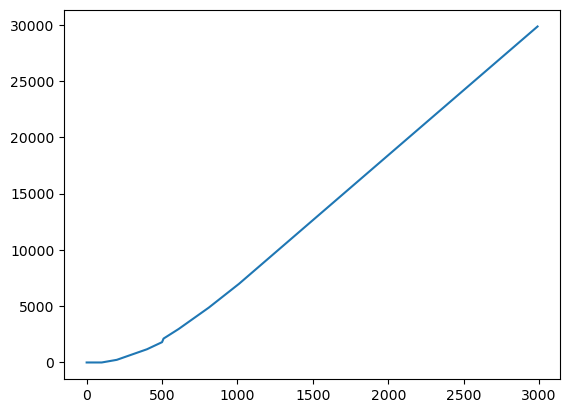

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns


sns.lineplot(data=precomputed_lookup_table)

In [10]:
calculate_bill(501)

units_consumed>500, so Using over500 slab


{'amount': np.float64(2048.4),
 'df':             start     end   rate  myunits  myunits_price
 slab                                                    
 0-100.0         0   100.0   0.00    100.0            0.0
 100-400.0     100   400.0   4.70    300.0         1410.0
 400-500.0     400   500.0   6.30    100.0          630.0
 500-600.0     500   600.0   8.40      1.0            8.4
 600-800.0     600   800.0   9.45      0.0            0.0
 800-1000.0    800  1000.0  10.50      0.0            0.0
 1000-inf     1000     inf  11.55      0.0            0.0,
 'units_consumed': 501}

In [17]:
inverted={float(val):key for key, val in precomputed_lookup_table.items()}
inverted

{0.0: 100,
 23.5: 110,
 47.0: 120,
 70.5: 130,
 94.0: 140,
 117.5: 150,
 141.0: 160,
 164.5: 170,
 188.0: 180,
 211.5: 190,
 235.0: 200,
 282.0: 210,
 329.0: 220,
 376.0: 230,
 423.0: 240,
 470.0: 250,
 517.0: 260,
 564.0: 270,
 611.0: 280,
 658.0: 290,
 705.0: 300,
 752.0: 310,
 799.0: 320,
 846.0: 330,
 893.0: 340,
 940.0: 350,
 987.0: 360,
 1034.0: 370,
 1081.0: 380,
 1128.0: 390,
 1175.0: 400,
 1238.0: 410,
 1301.0: 420,
 1364.0: 430,
 1427.0: 440,
 1490.0: 450,
 1553.0: 460,
 1616.0: 470,
 1679.0: 480,
 1742.0: 490,
 1805.0: 500,
 2124.0: 510,
 2208.0: 520,
 2292.0: 530,
 2376.0: 540,
 2460.0: 550,
 2544.0: 560,
 2628.0: 570,
 2712.0: 580,
 2796.0: 590,
 2880.0: 600,
 2974.5: 610,
 3069.0: 620,
 3163.5: 630,
 3258.0: 640,
 3352.5: 650,
 3447.0: 660,
 3541.5: 670,
 3636.0: 680,
 3730.5: 690,
 3825.0: 700,
 3919.5: 710,
 4014.0: 720,
 4108.5: 730,
 4203.0: 740,
 4297.5: 750,
 4392.0: 760,
 4486.5: 770,
 4581.0: 780,
 4675.5: 790,
 4770.0: 800,
 4875.0: 810,
 4980.0: 820,
 5085.0: 83

In [18]:
len(inverted)


290

In [13]:
def binary_search(L:list,x:int):
    low=0
    high=len(L)-1

    i=0
    while (low<high and i<200):
        print(f"boundary {low} to {high}")
        i+=1

        mid=int((low+high)/2)
        if x==L[mid]:
            break
        elif x>L[mid]:
            
            low=mid
           
        else:
            high=mid

        if low+1==high:
            break
               
    print(f"boundary {low} to {high}")
    low=low
    high=high#int(np.round(high))
    print (L[low],L[high])
    return (L[low],L[high])

price=750
low,high=binary_search(list(inverted.keys()),price)


boundary 0 to 289
boundary 0 to 144
boundary 0 to 72
boundary 0 to 36
boundary 18 to 36
boundary 18 to 27
boundary 18 to 22
boundary 20 to 22
boundary 20 to 21
705.0 752.0


In [14]:
def linear_interpolation(x,z1,z2):
    x1,y1=z1
    x2,y2=z2
    return y1 + (x - x1) / (x2 - x1) * (y2 - y1)

def esti(price,lowindex,highindex,D):
    lowerprice=D[lowindex]
    upperprice=D[highindex]

    print(lowerprice)
    print(upperprice)
    return linear_interpolation(price,(lowindex,lowerprice),(highindex,upperprice))

esti(price=price,lowindex=low,highindex=high,D=inverted)

300
310


np.float64(309.5744680851064)

In [19]:
inverted

{0.0: 100,
 23.5: 110,
 47.0: 120,
 70.5: 130,
 94.0: 140,
 117.5: 150,
 141.0: 160,
 164.5: 170,
 188.0: 180,
 211.5: 190,
 235.0: 200,
 282.0: 210,
 329.0: 220,
 376.0: 230,
 423.0: 240,
 470.0: 250,
 517.0: 260,
 564.0: 270,
 611.0: 280,
 658.0: 290,
 705.0: 300,
 752.0: 310,
 799.0: 320,
 846.0: 330,
 893.0: 340,
 940.0: 350,
 987.0: 360,
 1034.0: 370,
 1081.0: 380,
 1128.0: 390,
 1175.0: 400,
 1238.0: 410,
 1301.0: 420,
 1364.0: 430,
 1427.0: 440,
 1490.0: 450,
 1553.0: 460,
 1616.0: 470,
 1679.0: 480,
 1742.0: 490,
 1805.0: 500,
 2124.0: 510,
 2208.0: 520,
 2292.0: 530,
 2376.0: 540,
 2460.0: 550,
 2544.0: 560,
 2628.0: 570,
 2712.0: 580,
 2796.0: 590,
 2880.0: 600,
 2974.5: 610,
 3069.0: 620,
 3163.5: 630,
 3258.0: 640,
 3352.5: 650,
 3447.0: 660,
 3541.5: 670,
 3636.0: 680,
 3730.5: 690,
 3825.0: 700,
 3919.5: 710,
 4014.0: 720,
 4108.5: 730,
 4203.0: 740,
 4297.5: 750,
 4392.0: 760,
 4486.5: 770,
 4581.0: 780,
 4675.5: 790,
 4770.0: 800,
 4875.0: 810,
 4980.0: 820,
 5085.0: 83

In [107]:
import csv

def export_dict_to_csv(data:dict,filename):
    # File path
    file_path = "../data/processed/"+filename

    # Write dictionary to CSV
    with open(file_path, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['key','value'])  # Header row
        for key, value in data.items():
            writer.writerow([key, value])

    print(f"CSV successfully written to {file_path}")


In [108]:
export_dict_to_csv(data=precomputed_lookup_table,
                   filename="precomputed_ltable_unitsconsumed_price.csv")

CSV successfully written to ../data/processed/precomputed_ltable_unitsconsumed_price.csv


In [10]:
import csv

def import_csv_to_dict(filename):
    # Read CSV into a dictionary
    with open(filename, mode='r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        data={}
        for row in csv_reader:
            data[row['key']]=row['value']
        
        return data
    return data

In [11]:
import_csv_to_dict(filename="../data/processed/precomputed_ltable_unitsconsumed_price.csv")

{'0': '0.0',
 '10': '0.0',
 '20': '0.0',
 '30': '0.0',
 '40': '0.0',
 '50': '0.0',
 '60': '0.0',
 '70': '0.0',
 '80': '0.0',
 '90': '0.0',
 '100': '0.0',
 '110': '23.5',
 '120': '47.0',
 '130': '70.5',
 '140': '94.0',
 '150': '117.5',
 '160': '141.0',
 '170': '164.5',
 '180': '188.0',
 '190': '211.5',
 '200': '235.0',
 '210': '282.0',
 '220': '329.0',
 '230': '376.0',
 '240': '423.0',
 '250': '470.0',
 '260': '517.0',
 '270': '564.0',
 '280': '611.0',
 '290': '658.0',
 '300': '705.0',
 '310': '752.0',
 '320': '799.0',
 '330': '846.0',
 '340': '893.0',
 '350': '940.0',
 '360': '987.0',
 '370': '1034.0',
 '380': '1081.0',
 '390': '1128.0',
 '400': '1175.0',
 '410': '1238.0',
 '420': '1301.0',
 '430': '1364.0',
 '440': '1427.0',
 '450': '1490.0',
 '460': '1553.0',
 '470': '1616.0',
 '480': '1679.0',
 '490': '1742.0',
 '500': '1805.0',
 '510': '2124.0',
 '520': '2208.0',
 '530': '2292.0',
 '540': '2376.0',
 '550': '2460.0',
 '560': '2544.0',
 '570': '2628.0',
 '580': '2712.0',
 '590': '279

In [12]:
filename=r"../data/processed/precomputed_ltable_unitsconsumed_price.csv"
df=pd.read_csv(filename)

In [ ]:
data_inverted = df.to_dict(orient="list") 
data_inverted= dict(zip(df["value"],df["key"]))
data_inverted

{0.0: 100,
 23.5: 110,
 47.0: 120,
 70.5: 130,
 94.0: 140,
 117.5: 150,
 141.0: 160,
 164.5: 170,
 188.0: 180,
 211.5: 190,
 235.0: 200,
 282.0: 210,
 329.0: 220,
 376.0: 230,
 423.0: 240,
 470.0: 250,
 517.0: 260,
 564.0: 270,
 611.0: 280,
 658.0: 290,
 705.0: 300,
 752.0: 310,
 799.0: 320,
 846.0: 330,
 893.0: 340,
 940.0: 350,
 987.0: 360,
 1034.0: 370,
 1081.0: 380,
 1128.0: 390,
 1175.0: 400,
 1238.0: 410,
 1301.0: 420,
 1364.0: 430,
 1427.0: 440,
 1490.0: 450,
 1553.0: 460,
 1616.0: 470,
 1679.0: 480,
 1742.0: 490,
 1805.0: 500,
 2124.0: 510,
 2208.0: 520,
 2292.0: 530,
 2376.0: 540,
 2460.0: 550,
 2544.0: 560,
 2628.0: 570,
 2712.0: 580,
 2796.0: 590,
 2880.0: 600,
 2974.5: 610,
 3069.0: 620,
 3163.5: 630,
 3258.0: 640,
 3352.5: 650,
 3447.0: 660,
 3541.5: 670,
 3636.0: 680,
 3730.5: 690,
 3825.0: 700,
 3919.5: 710,
 4014.0: 720,
 4108.5: 730,
 4203.0: 740,
 4297.5: 750,
 4392.0: 760,
 4486.5: 770,
 4581.0: 780,
 4675.5: 790,
 4770.0: 800,
 4875.0: 810,
 4980.0: 820,
 5085.0: 83

{0: 0.0}

In [ ]:
def obtain_values(filename):
    df=pd.read_csv(filepath_or_buffer=filename)
    
    data = df.to_dict(orient="list") 
    data= dict(zip(df["key"],df["value"]))
    return data

## REVERSE lookup

In [27]:
#MANUAL

filename=os.path.join(DATA_FOLDER,r"processed/precomputed_ltable_unitsconsumed_price.csv")


In [28]:
def __load_reverse_ltable(filename):


    df=pd.read_csv(filepath_or_buffer=filename)
    data_inverted = df.to_dict(orient="list") 
    data_inverted= dict(zip(df["value"],df["key"]))
    return data_inverted

data_inverted=__load_reverse_ltable(filename)

In [39]:
def __determine_border_prices(L:list,x:int): 
        '''almost like binary search'''
        low=0
        high=len(L)-1

        i=0
        while (low<high and i<200):
            print(f"boundary {low} to {high}")
            i+=1

            mid=int((low+high)/2)
            if x==L[mid]:
                break
            elif x>L[mid]:
                
                low=mid
            
            else:
                high=mid

            if low+1==high:
                break
               
        #print(f"boundary indices {low} to {high}")
        low=low
        high=high#int(np.round(high))
        print (f"boundary prices {L[low]} and {L[high]}")
        return (L[low],L[high])

In [40]:
def __determine_corresponding_border_units(lowerindex,upperindex,data_inverted):
        lowerunits=data_inverted[lowerindex]
        upperunits=data_inverted[upperindex]

        return lowerunits,upperunits


In [41]:
def __linear_interpolation(x,z1,z2):
        x1,y1=z1
        x2,y2=z2
        return y1 + (x - x1) / (x2 - x1) * (y2 - y1)


In [ ]:
def determine_units_using_billAmount(price):
    lowerprice,upperprice=__determine_border_prices(list(data_inverted.keys()),price)
    lowerunits,upperunits=__determine_corresponding_border_units(lowerprice,upperprice,data_inverted)

    esti_units=__linear_interpolation(price,(lowerprice,lowerunits),(upperprice,upperunits))
    
    return int(esti_units)



In [43]:
#test
determine_units_using_billAmount(price=400)

boundary 0 to 289
boundary 0 to 144
boundary 0 to 72
boundary 0 to 36
boundary 0 to 18
boundary 9 to 18
boundary 13 to 18
boundary 13 to 15
boundary prices 376.0 and 423.0


235.10638297872342

Log: after adding a new helper function to autogen filename 

In [24]:

tbe_df=pd.DataFrame(precomputed_lookup_table.items(),columns=["key","value"])
tbe_df

,key,value
0,0,0.0
1,10,0.0
2,20,0.0
3,30,0.0
4,40,0.0
...,...,...
295,2950,29392.5
296,2960,29508.0
297,2970,29623.5
298,2980,29739.0


In [25]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the src directory to the Python path
src_path=os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)

sys.path

['e:\\code\\tn-electricity-bill-calculator\\.conda\\python311.zip',
 'e:\\code\\tn-electricity-bill-calculator\\.conda\\DLLs',
 'e:\\code\\tn-electricity-bill-calculator\\.conda\\Lib',
 'e:\\code\\tn-electricity-bill-calculator\\.conda',
 '',
 'e:\\code\\tn-electricity-bill-calculator\\.conda\\Lib\\site-packages',
 'e:\\code\\tn-electricity-bill-calculator\\.conda\\Lib\\site-packages\\win32',
 'e:\\code\\tn-electricity-bill-calculator\\.conda\\Lib\\site-packages\\win32\\lib',
 'e:\\code\\tn-electricity-bill-calculator\\.conda\\Lib\\site-packages\\Pythonwin',
 'e:\\code\\tn-electricity-bill-calculator\\src']

In [27]:
from utils.fileutils import generate_timestamped_filepath, obtain_latest_timestamp_filepath
tbe_df.to_csv(generate_timestamped_filepath("../data/processed","pclt_units_price.csv"),index=False)

dict_items([(0, np.float64(0.0)), (10, np.float64(0.0)), (20, np.float64(0.0)), (30, np.float64(0.0)), (40, np.float64(0.0)), (50, np.float64(0.0)), (60, np.float64(0.0)), (70, np.float64(0.0)), (80, np.float64(0.0)), (90, np.float64(0.0)), (100, np.float64(0.0)), (110, np.float64(23.5)), (120, np.float64(47.0)), (130, np.float64(70.5)), (140, np.float64(94.0)), (150, np.float64(117.5)), (160, np.float64(141.0)), (170, np.float64(164.5)), (180, np.float64(188.0)), (190, np.float64(211.5)), (200, np.float64(235.0)), (210, np.float64(282.0)), (220, np.float64(329.0)), (230, np.float64(376.0)), (240, np.float64(423.0)), (250, np.float64(470.0)), (260, np.float64(517.0)), (270, np.float64(564.0)), (280, np.float64(611.0)), (290, np.float64(658.0)), (300, np.float64(705.0)), (310, np.float64(752.0)), (320, np.float64(799.0)), (330, np.float64(846.0)), (340, np.float64(893.0)), (350, np.float64(940.0)), (360, np.float64(987.0)), (370, np.float64(1034.0)), (380, np.float64(1081.0)), (390, np.